In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import train_test_split
import seaborn as sb
from platform import python_version

from sklearn.metrics import mean_squared_error as mse

print(python_version())
print(np.version.version)
print(pd.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(sb.__version__)

3.7.15
1.21.6
1.3.5
3.2.2
1.0.2
0.11.2


**Reading the original dataframe provided by NIST for supercritical R134a**

In [3]:
o_df=pd.read_excel('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical.xlsx',index_col=None)
o_df

,T ©,P (kPa),Density (kg/m^3),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Cv (kJ/kg.K),Cp (kJ/kg.K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (Pa.s),Therm. Cond. (W/m.K),Phase
0,105,5000,747.25,0.001338,363.87,370.56,1.5076,1.0795,3.0776,154.14,3.7056,0.000059,0.049471,supercritical
1,110,5000,607.83,0.001645,382.80,391.02,1.5613,1.1388,5.6750,113.93,7.1988,0.000043,0.048603,supercritical
2,115,5000,415.55,0.002406,409.23,421.27,1.6398,1.1466,4.9288,107.21,10.9520,0.000029,0.042062,supercritical
3,120,5000,335.33,0.002982,425.18,440.09,1.6880,1.1084,2.9762,115.05,11.2280,0.000024,0.035550,supercritical
4,125,5000,295.62,0.003383,436.13,453.04,1.7207,1.0859,2.3006,122.15,10.7140,0.000023,0.032478,supercritical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,130,9000,742.78,0.001346,391.04,403.16,1.5773,1.0669,2.0630,197.96,2.2524,0.000059,0.048977,supercritical
166,135,9000,700.80,0.001427,400.81,413.65,1.6032,1.0760,2.1301,185.05,2.6710,0.000054,0.047354,supercritical
167,140,9000,657.52,0.001521,410.74,424.43,1.6295,1.0844,2.1794,174.38,3.1179,0.000049,0.045810,supercritical
168,145,9000,614.30,0.001628,420.74,435.39,1.6558,1.0915,2.1987,166.27,3.5599,0.000045,0.044349,supercritical


In [4]:
o_df.describe()

,T ©,P (kPa),Density (kg/m^3),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Cv (kJ/kg.K),Cp (kJ/kg.K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,127.500000,7000.000000,595.597765,0.001946,404.674529,417.646647,1.619898,1.078839,2.395639,166.234471,4.905583,0.000047,0.044100
std,14.403833,1228.363033,200.706159,0.000851,35.419155,39.287207,0.100510,0.027507,0.648891,42.045330,2.843087,0.000019,0.007586
min,105.000000,5000.000000,214.900000,0.001090,346.090000,355.900000,1.456400,1.021200,1.526200,107.210000,0.888880,0.000021,0.028618
25%,115.000000,6000.000000,419.902500,0.001294,373.317500,383.440000,1.531225,1.058400,1.993225,134.017500,2.331100,0.000030,0.038638
50%,127.500000,7000.000000,613.770000,0.001629,404.305000,416.565000,1.614750,1.082800,2.245150,151.165000,4.255100,0.000045,0.045191
75%,140.000000,8000.000000,772.565000,0.002382,434.592500,450.480000,1.701200,1.100100,2.552325,192.687500,7.521650,0.000063,0.050021
max,150.000000,9000.000000,917.640000,0.004653,474.340000,497.610000,1.829500,1.147500,5.675000,281.380000,11.228000,0.000088,0.057763


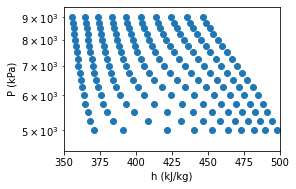

In [5]:
fig=plt.figure();
ax=fig.add_axes([0,0,.5,.5]);
ax.set_yscale('log');
plt.ylim([4500, 9500]);
plt.xlim([350, 500]);
ax.scatter(x=o_df['h (kJ/kg)'].values,y=o_df['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=10);
ax.set_xlabel('h (kJ/kg)',fontsize=10);

#Augmenting the data first for pressure
As you know the supercritical data consists of a set of small tables  with constant pressure with a little bit far apart, so the augmentation done here is to generate some new small tables for new different constant pressure values for each table. The temperatures for new tables ranges from the lower limit saturation T which will be calculated by interpolation and the upper limit is the max T in the previous sub table, Why? beside it's the criterion ready made tables from NIST, it's the most safe we because if we take the max of the next sub table we maybe exceed the natural upper limit temperature of the refrigerant R134a at that new point we which interplote.


**Finally:** the resulting table is the same to the original data with a new sub tables.

In [6]:
o_df.columns

Index(['T ©', 'P (kPa)', 'Density (kg/m^3)', 'v (m^3/kg)', 'u (kJ/kg)',
       'h (kJ/kg)', 's (kJ/kg.K)', 'Cv (kJ/kg.K)', 'Cp (kJ/kg.K)',
       'Sound Spd. (m/s)', 'Joule-Thomson (K/MPa)', 'Viscosity (Pa.s)',
       'Therm. Cond. (W/m.K)', 'Phase'],
      dtype='object')

In [7]:
step=.2
generated={'T ©':[],
           'P (kPa)':[],
           'v (m^3/kg)':[],
           'u (kJ/kg)':[],
           'h (kJ/kg)':[],
           's (kJ/kg.K)':[],
           'Sound Spd. (m/s)':[],
           'Viscosity (Pa.s)':[],
           'Therm. Cond. (W/m.K)':[]}



#The o_df is the original data but in a form of tidy data, so all sub tables 
#exist here but on top of each other. Hence the fisrt iteration is over it by 
#pressure to take one subtable at a time
for i,P1 in enumerate(o_df['P (kPa)'].unique()):
  if (P1 ==o_df['P (kPa)'].unique().max()): break 
  #Break when reaching the end of the o_df because there is no sub tables else

  else:
    P2=o_df['P (kPa)'].unique()[i+1] #Here we take the next sub table to interpolate with

    #Reset index is important because it will be used to handle it, while when 
    #copying it the index was the old one for that portion
    df1=o_df[o_df['P (kPa)']==P1]
    df2=o_df[o_df['P (kPa)']==P2]
    print("=============================================")
    print("main table P1= {} and P2= {}".format(P1,P2)) #Indecation


    #Now the iteration for an intermediate values of pressure 
    #between the two values of the two sub tables
    #The step here is approximatly by 500 Pascal
    for P in np.linspace(P1,P2,num=int(((P2-P1)/step))):
    
      #The sturation temp for the sub tables table
      T1_sat=df1['T ©'].values.min()
      T2_sat=df2['T ©'].values.min()
      
      #The sturation temp for the new sub table table will be generated
      T_sat= (T2_sat-((P2-P)/(P2-P1)*(T2_sat-T1_sat)))
      #The max temp interpreted above in the written text
      T_max=df1['T ©'].max()
      print("For P {} the sat {} and the max {}".format(P,T_sat,T_max))

      for i,T in enumerate(df2['T ©'].values):
        if (i==0): continue
        #elif (T>T_max): df2.drop(index=df2[df2['T ©']==T].index,inplace=True)
        elif(T not in (df1['T ©'].values) ): df2.drop(index=df2[df2['T ©']==T].index,inplace=True)

      for i,T in enumerate(df1['T ©'].values):
        if(i==0): continue
        #elif(T<T_sat): df1.drop(index=df1[df1['T ©']==T].index,inplace=True)
        elif((T not in (df2['T ©'].values)) | (T == df2['T ©'].min()) ): df1.drop(index=df1[df1['T ©']==T].index,inplace=True)

      #print(len(df1)==len(df2))

      T_col=np.array(df1['T ©'].values)
      T_col[0]=T_sat

      P_col=np.array(df1['T ©'].values)
      P_col.fill(P)

      v_col=(((np.array(df2['v (m^3/kg)'])-np.array(df1['v (m^3/kg)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['v (m^3/kg)'])
      u_col=(((np.array(df2['u (kJ/kg)'])-np.array(df1['u (kJ/kg)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['u (kJ/kg)'])
      h_col=(((np.array(df2['h (kJ/kg)'])-np.array(df1['h (kJ/kg)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['h (kJ/kg)'])
      s_col=(((np.array(df2['s (kJ/kg.K)'])-np.array(df1['s (kJ/kg.K)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['s (kJ/kg.K)'])
      speed_col=(((np.array(df2['Sound Spd. (m/s)'])-np.array(df1['Sound Spd. (m/s)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['Sound Spd. (m/s)'])
      visc_col=(((np.array(df2['Viscosity (Pa.s)'])-np.array(df1['Viscosity (Pa.s)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['Viscosity (Pa.s)'])
      cond_col=(((np.array(df2['Therm. Cond. (W/m.K)'])-np.array(df1['Therm. Cond. (W/m.K)']))/(np.array(df2['P (kPa)'])-np.array(df1['P (kPa)'])))*(P_col-np.array(df1['P (kPa)'])))+np.array(df1['Therm. Cond. (W/m.K)'])

      generated['T ©'].extend(T_col)
      generated['P (kPa)'].extend(P_col)
      generated['v (m^3/kg)'].extend(v_col)
      generated['u (kJ/kg)'].extend(u_col)
      generated['h (kJ/kg)'].extend(h_col)
      generated['s (kJ/kg.K)'].extend(s_col)
      generated['Viscosity (Pa.s)'].extend(visc_col)
      generated['Sound Spd. (m/s)'].extend(speed_col)
      generated['Therm. Cond. (W/m.K)'].extend(cond_col)
      print("Appended P {} ,T {}, v {}, u {}, h {}, s{}".format(P_col[0],T_col[0],v_col[0],u_col[0],h_col[0],s_col[0]))
      #display(pd.DataFrame(columns))

df_part1=pd.DataFrame(generated)
generated=0
df_part1


Streaming output truncated to the last 5000 lines.
For P 8500.200160128103 the sat 105.0 and the max 150
Appended P 8500 ,T 105, v 0.0011033, u 347.34, h 356.72, s1.4601
For P 8500.400320256205 the sat 105.0 and the max 150
Appended P 8500 ,T 105, v 0.0011033, u 347.34, h 356.72, s1.4601
For P 8500.600480384308 the sat 105.0 and the max 150
Appended P 8500 ,T 105, v 0.0011033, u 347.34, h 356.72, s1.4601
For P 8500.80064051241 the sat 105.0 and the max 150
Appended P 8500 ,T 105, v 0.0011033, u 347.34, h 356.72, s1.4601
For P 8501.000800640513 the sat 105.0 and the max 150
Appended P 8501 ,T 105, v 0.001103272, u 347.33743999999996, h 356.71832, s1.4600924
For P 8501.200960768614 the sat 105.0 and the max 150
Appended P 8501 ,T 105, v 0.001103272, u 347.33743999999996, h 356.71832, s1.4600924
For P 8501.401120896717 the sat 105.0 and the max 150
Appended P 8501 ,T 105, v 0.001103272, u 347.33743999999996, h 356.71832, s1.4600924
For P 8501.60128102482 the sat 105.0 and the max 150
Appe

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,105,5000,0.001338,363.87,370.56,1.5076,154.14,0.000059,0.049471
1,110,5000,0.001645,382.80,391.02,1.5613,113.93,0.000043,0.048603
2,115,5000,0.002406,409.23,421.27,1.6398,107.21,0.000029,0.042062
3,120,5000,0.002982,425.18,440.09,1.6880,115.05,0.000024,0.035550
4,125,5000,0.003383,436.13,453.04,1.7207,122.15,0.000023,0.032478
...,...,...,...,...,...,...,...,...,...
199995,130,9000,0.001346,391.04,403.16,1.5773,197.96,0.000059,0.048977
199996,135,9000,0.001427,400.81,413.65,1.6032,185.05,0.000054,0.047354
199997,140,9000,0.001521,410.74,424.43,1.6295,174.38,0.000049,0.045810
199998,145,9000,0.001628,420.74,435.39,1.6558,166.27,0.000045,0.044349


In [8]:
df_part1=df_part1.drop_duplicates(subset=['T ©','P (kPa)'])

In [9]:
df_part1.describe()

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,40010.000000,40010.000000,40010.000000,40010.000000,40010.000000,40010.000000,40010.000000,40010.000000,40010.000000
mean,127.500000,7000.000000,0.001924,404.374872,417.265035,1.618854,165.942247,0.000047,0.044181
std,14.361586,1155.003611,0.000810,35.068855,38.875952,0.099189,41.212131,0.000019,0.007390
min,105.000000,5000.000000,0.001090,346.090000,355.900000,1.456400,107.210000,0.000021,0.028618
25%,115.000000,6000.000000,0.001294,373.219700,382.913190,1.531014,134.537310,0.000031,0.038711
50%,127.500000,7000.000000,0.001626,403.948420,415.982440,1.615204,151.183480,0.000045,0.045048
75%,140.000000,8000.000000,0.002328,434.136860,449.962020,1.700124,192.719300,0.000063,0.050025
max,150.000000,9000.000000,0.004653,474.340000,497.610000,1.829500,281.380000,0.000088,0.057763


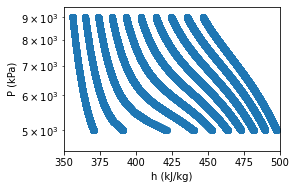

In [10]:
fig=plt.figure();
ax=fig.add_axes([0,0,.5,.5]);
ax.set_yscale('log');
plt.ylim([4500, 9500]);
plt.xlim([350, 500]);
ax.scatter(x=df_part1['h (kJ/kg)'].values,y=df_part1['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=10);
ax.set_xlabel('h (kJ/kg)',fontsize=10);

In [11]:
'''file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical_augmented_{}_for_P_part1.csv'.format(step)
  
# saving the excel
df_part1.to_csv(file_name,index=False,)
print('DataFrame is written to csv File successfully.',file_name)'''

"file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical_augmented_{}_for_P_part1.csv'.format(step)\n  \n# saving the excel\ndf_part1.to_csv(file_name,index=False,)\nprint('DataFrame is written to csv File successfully.',file_name)"

In [12]:
'''df_part1=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical_augmented_0.5_for_P_part1.csv')

df_part1'''

"df_part1=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical_augmented_0.5_for_P_part1.csv')\n\ndf_part1"

#Augmenting the data second with various temperatures for each sub table
The generated dataframe above contains tables what we can call clusters cover the entire range of pressure with a little bit far part temperature values so now we will do interpolation for each cluster to generate more temperature values between the two end, first is the saturation and the second is the maximum temperatures by interpolating new points of T between each two consequent temperature points with a constant arbitrary valued step.

**Finally:**the resulting table is quite same to the above one, here the number of clusters is the same to the above but contains more row than it because of generating new ones.


In [13]:
df_part1.duplicated(subset=['T ©','P (kPa)']).sum()

0

In [14]:
deg=.25
generated={'T ©':[],
           'P (kPa)':[],
           'v (m^3/kg)':[],
           'u (kJ/kg)':[],
           'h (kJ/kg)':[],
           's (kJ/kg.K)':[],
           'Sound Spd. (m/s)':[],
           'Viscosity (Pa.s)':[],
           'Therm. Cond. (W/m.K)':[]}


#Using Ps for interpolating is because of it is the unique property from cluster to another.
for P in (df_part1['P (kPa)'].unique()):
    
    #The below df is a cluster copy from the big data frame that was been generated.
    df=df_part1[df_part1['P (kPa)']==P]
    

    #Now we iterate over the cluster with temperature T_upper to interpolate with
    #and i to get the next temperature from the next row T_lower
    for i,T_upper in enumerate(df['T ©'].unique()):
        if T_upper==df['T ©'].max():
          generated['T ©'].append(T_upper)
          generated['P (kPa)'].append(P)
          generated['v (m^3/kg)'].append(float(df[df['T ©']==T_upper]['v (m^3/kg)'].values))
          generated['u (kJ/kg)'].append(float(df[df['T ©']==T_upper]['u (kJ/kg)'].values))
          generated['h (kJ/kg)'].append(float(df[df['T ©']==T_upper]['h (kJ/kg)'].values))
          generated['s (kJ/kg.K)'].append(float(df[df['T ©']==T_upper]['s (kJ/kg.K)'].values))
          generated['Sound Spd. (m/s)'].append(float(df[df['T ©']==T_upper]['Sound Spd. (m/s)'].values))
          generated['Viscosity (Pa.s)'].append(float(df[df['T ©']==T_upper]['Viscosity (Pa.s)'].values))
          generated['Therm. Cond. (W/m.K)'].append(float(df[df['T ©']==T_upper]['Therm. Cond. (W/m.K)'].values))
          print('Appended the original data!')
          print("End of df")
          break #Break when reaching the end of cluster because there is not T_lower else

        else:
          T_lower=(df.iloc[i+1]['T ©'])


        #Now iterpolation for an intermediate values of T between T_upper and T_lower
        #The step here is approximatly .3 degree celsius 
        T_col= np.linspace(T_upper,T_lower,num=int(np.abs(np.abs(T_lower)-np.abs(T_upper))/deg),endpoint=False)
        P_col=np.full(shape=T_col.shape,fill_value=P)
        if (len(T_col)==0):continue

        upper_row=np.array(df[df['T ©']==T_upper][['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)', 's (kJ/kg.K)','Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']])
        lower_row=np.array(df[df['T ©']==T_lower][['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)', 's (kJ/kg.K)', 'Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']])
        props=((np.tile(((lower_row-upper_row)/(T_lower-T_upper)), (T_col.shape[0], 1)))*(T_col-T_upper)[:,None])+upper_row        

        generated['T ©'].extend(T_col)
        generated['P (kPa)'].extend(P_col)
        generated['v (m^3/kg)'].extend(props[:,0])
        generated['u (kJ/kg)'].extend(props[:,1])
        generated['h (kJ/kg)'].extend(props[:,2])
        generated['s (kJ/kg.K)'].extend(props[:,3])
        generated['Sound Spd. (m/s)'].extend(props[:,4])
        generated['Viscosity (Pa.s)'].extend(props[:,5])
        generated['Therm. Cond. (W/m.K)'].extend(props[:,6])

        print("Appended P {} ,T {}, v {}, u {}, h {}, s{}".format(P_col[0],T_col[0],props[:,0][0],props[:,1][0],props[:,2][0],props[:,3][0]))
        #display(pd.DataFrame(columns))

generated_df=pd.DataFrame(generated)
generated=0
generated_df

Streaming output truncated to the last 5000 lines.
Appended P 8546 ,T 130.0, v 0.0013922136, u 393.60768, h 405.49976, s1.5847087999999998
Appended P 8546 ,T 135.0, v 0.001488284, u 403.818, h 416.52903999999995, s1.61188
Appended P 8546 ,T 140.0, v 0.001601168, u 414.20016, h 427.87832000000003, s1.6395144000000001
Appended P 8546 ,T 145.0, v 0.001729268, u 424.55519999999996, h 439.32864, s1.667104
Appended the original data!
End of df
Appended P 8547 ,T 105.0, v 0.001101984, u 347.21968, h 356.64104000000003, s1.4597428
Appended P 8547 ,T 110.0, v 0.0011424456000000002, u 355.899, h 365.66035999999997, s1.4834052
Appended P 8547 ,T 115.0, v 0.0011896568, u 364.84456, h 375.01216, s1.50763
Appended P 8547 ,T 120.0, v 0.0012453800000000001, u 374.09448000000003, h 384.73832, s1.532536
Appended P 8547 ,T 125.0, v 0.0013120212, u 383.67688000000004, h 394.89508, s1.5582232
Appended P 8547 ,T 130.0, v 0.0013921051999999999, u 393.60176, h 405.49432, s1.5846916
Appended P 8547 ,T 135.0, v

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,105.00,5000,0.001338,363.8700,370.5600,1.507600,154.1400,0.000059,0.049471
1,105.25,5000,0.001354,364.8165,371.5830,1.510285,152.1295,0.000058,0.049428
2,105.50,5000,0.001369,365.7630,372.6060,1.512970,150.1190,0.000057,0.049384
3,105.75,5000,0.001384,366.7095,373.6290,1.515655,148.1085,0.000057,0.049341
4,106.00,5000,0.001400,367.6560,374.6520,1.518340,146.0980,0.000056,0.049297
...,...,...,...,...,...,...,...,...,...
724176,149.00,9000,0.001722,428.6600,444.1660,1.676680,161.8300,0.000042,0.043247
724177,149.25,9000,0.001728,429.1550,444.7145,1.677985,161.5525,0.000042,0.043178
724178,149.50,9000,0.001734,429.6500,445.2630,1.679290,161.2750,0.000042,0.043109
724179,149.75,9000,0.001740,430.1450,445.8115,1.680595,160.9975,0.000042,0.043040


In [15]:
generated_df.drop_duplicates()

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,105.00,5000,0.001338,363.8700,370.5600,1.507600,154.1400,0.000059,0.049471
1,105.25,5000,0.001354,364.8165,371.5830,1.510285,152.1295,0.000058,0.049428
2,105.50,5000,0.001369,365.7630,372.6060,1.512970,150.1190,0.000057,0.049384
3,105.75,5000,0.001384,366.7095,373.6290,1.515655,148.1085,0.000057,0.049341
4,106.00,5000,0.001400,367.6560,374.6520,1.518340,146.0980,0.000056,0.049297
...,...,...,...,...,...,...,...,...,...
724176,149.00,9000,0.001722,428.6600,444.1660,1.676680,161.8300,0.000042,0.043247
724177,149.25,9000,0.001728,429.1550,444.7145,1.677985,161.5525,0.000042,0.043178
724178,149.50,9000,0.001734,429.6500,445.2630,1.679290,161.2750,0.000042,0.043109
724179,149.75,9000,0.001740,430.1450,445.8115,1.680595,160.9975,0.000042,0.043040


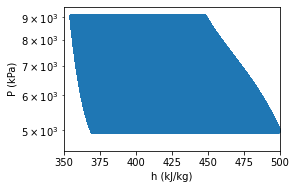

In [16]:
fig=plt.figure();
ax=fig.add_axes([0,0,.5,.5]);
ax.set_yscale('log');
plt.ylim([4500, 9500]);
plt.xlim([350, 500]);
ax.scatter(x=generated_df['h (kJ/kg)'].values,y=generated_df['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=10);
ax.set_xlabel('h (kJ/kg)',fontsize=10);

In [17]:
'''file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical_augmented_{}_for_P_{}_for_T.csv'.format(step,deg)
  
# saving the excel
generated_df.to_csv(file_name,index=False,)
print('DataFrame is written to csv File successfully.',file_name)'''

"file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical_augmented_{}_for_P_{}_for_T.csv'.format(step,deg)\n  \n# saving the excel\ngenerated_df.to_csv(file_name,index=False,)\nprint('DataFrame is written to csv File successfully.',file_name)"

In [18]:
'''generated_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical_augmented_0.5_for_P_0.5_for_T.csv')

generated_df'''

"generated_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical_augmented_0.5_for_P_0.5_for_T.csv')\n\ngenerated_df"

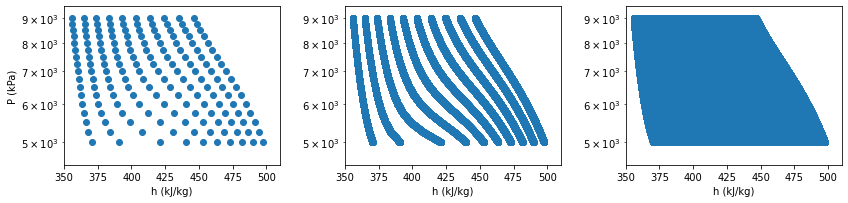

In [19]:
fig=plt.figure();

for i in range(0,3):
  if i == 0: df=o_df
  elif i==1: df=df_part1
  elif i==2: df=generated_df
  ax=fig.add_axes([(i*.65),0,.5,.55]);
  ax.set_yscale('log');
  plt.ylim([4500, 9500]);
  plt.xlim([350, 510]);
  ax.scatter(x=df['h (kJ/kg)'].values,y=df['P (kPa)'].values,c='#1f77b4',marker='o');
  if i ==0 :ax.set_ylabel('P (kPa)',fontsize=10);
  ax.set_xlabel('h (kJ/kg)',fontsize=10);

#Training the models with various Ks

In [20]:
supercritical_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical_augmented_0.5_for_P_0.5_for_T.csv')
supercritical_df

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,105.0,5000,0.001338,363.870,370.560,1.50760,154.140,0.000059,0.049471
1,105.5,5000,0.001369,365.763,372.606,1.51297,150.119,0.000057,0.049384
2,106.0,5000,0.001400,367.656,374.652,1.51834,146.098,0.000056,0.049297
3,106.5,5000,0.001430,369.549,376.698,1.52371,142.077,0.000054,0.049211
4,107.0,5000,0.001461,371.442,378.744,1.52908,138.056,0.000053,0.049124
...,...,...,...,...,...,...,...,...,...
364086,148.0,9000,0.001699,426.680,441.972,1.67146,162.940,0.000043,0.043522
364087,148.5,9000,0.001711,427.670,443.069,1.67407,162.385,0.000043,0.043384
364088,149.0,9000,0.001722,428.660,444.166,1.67668,161.830,0.000042,0.043247
364089,149.5,9000,0.001734,429.650,445.263,1.67929,161.275,0.000042,0.043109


In [21]:
supercritical_valid_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_supercritical_augmented_0.2_for_P_0.25_for_T.csv')
supercritical_valid_df

,T ©,P (kPa),v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,105.00,5000,0.001338,363.8700,370.5600,1.507600,154.1400,0.000059,0.049471
1,105.25,5000,0.001354,364.8165,371.5830,1.510285,152.1295,0.000058,0.049428
2,105.50,5000,0.001369,365.7630,372.6060,1.512970,150.1190,0.000057,0.049384
3,105.75,5000,0.001384,366.7095,373.6290,1.515655,148.1085,0.000057,0.049341
4,106.00,5000,0.001400,367.6560,374.6520,1.518340,146.0980,0.000056,0.049297
...,...,...,...,...,...,...,...,...,...
724176,149.00,9000,0.001722,428.6600,444.1660,1.676680,161.8300,0.000042,0.043247
724177,149.25,9000,0.001728,429.1550,444.7145,1.677985,161.5525,0.000042,0.043178
724178,149.50,9000,0.001734,429.6500,445.2630,1.679290,161.2750,0.000042,0.043109
724179,149.75,9000,0.001740,430.1450,445.8115,1.680595,160.9975,0.000042,0.043040


In [22]:
supercritical_X_train= supercritical_X_test= supercritical_df[['T ©', 'P (kPa)']]
supercritical_y_train= supercritical_y_test = supercritical_df[['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)','s (kJ/kg.K)',  'Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']]

In [23]:
a, supercritical_valid_X, c, supercritical_valid_y = train_test_split(supercritical_valid_df[['T ©', 'P (kPa)']],
                                                    supercritical_valid_df[['v (m^3/kg)', 'u (kJ/kg)', 'h (kJ/kg)','s (kJ/kg.K)',  'Sound Spd. (m/s)', 'Viscosity (Pa.s)','Therm. Cond. (W/m.K)']],
                                                    test_size=.005,
                                                    random_state=40,
                                                    shuffle=True)
len(supercritical_valid_X)

3621

In [24]:
for K in range(1,6):

  supercritical_model=KNR(n_neighbors=K,weights='distance',p=1)
  supercritical_model.fit(supercritical_X_train, supercritical_y_train)
  print("For K = {}, The test error is {} %.".format(K,((np.abs((supercritical_model.predict(supercritical_X_test)-supercritical_y_test)/supercritical_y_test)).max().max())*100))

For K = 1, The test error is 0.0 %.
For K = 2, The test error is 0.0 %.
For K = 3, The test error is 0.0 %.
For K = 4, The test error is 0.0 %.
For K = 5, The test error is 0.0 %.


In [25]:
for K in range(1,11):

  supercritical_model=KNR(n_neighbors=K,weights='distance',p=1)
  supercritical_model.fit(supercritical_X_train, supercritical_y_train)
  print("For K = {}, The validation error is {} %.".format(K,((np.abs((supercritical_model.predict(supercritical_valid_X)-supercritical_valid_y)/supercritical_valid_y)).max().max())*100))

For K = 1, The validation error is 2.1923750995136357 %.
For K = 2, The validation error is 8.997429549139122e-12 %.
For K = 3, The validation error is 0.939589328363001 %.
For K = 4, The validation error is 0.526846732347345 %.
For K = 5, The validation error is 0.7612871526734707 %.
For K = 6, The validation error is 1.1265191847970177 %.
For K = 7, The validation error is 1.0031449719029795 %.
For K = 8, The validation error is 0.9049553844282308 %.
For K = 9, The validation error is 0.9037180933959761 %.
For K = 10, The validation error is 0.650213535957457 %.


#Analyzing the best model

In [26]:
K=4
supercritical_model=KNR(n_neighbors=K,weights='distance',p=1)
supercritical_model.fit(supercritical_X_train, supercritical_y_train)
print("For K = {}, The validation maximum percent error is {} %.".format(K,((np.abs((supercritical_model.predict(supercritical_valid_X)-supercritical_valid_y)/supercritical_valid_y)).max().max())*100))
print("For K = {}, The validation minimum percent error is {} %.".format(K,((np.abs((supercritical_model.predict(supercritical_valid_X)-supercritical_valid_y)/supercritical_valid_y)).min().min())*100))
start=time.time()
supercritical_model.predict(supercritical_valid_X)
print("The elapsed time for predicting {} entry is {} seconds.".format(len(supercritical_valid_X),(time.time()-start)))

For K = 4, The validation maximum percent error is 0.526846732347345 %.
For K = 4, The validation minimum percent error is 0.0 %.
The elapsed time for predicting 3621 entry is 0.020027637481689453 seconds.


In [27]:
supercritical_error_df= ((supercritical_model.predict(supercritical_valid_X)-supercritical_valid_y)/supercritical_valid_y)*100
supercritical_error_df.describe()

,v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,3.621000e+03,3.621000e+03,3.621000e+03,3.621000e+03,3.621000e+03,3.621000e+03,3.621000e+03
mean,9.199846e-04,6.377159e-06,1.767664e-05,-1.552891e-05,1.254533e-03,2.331152e-03,5.262003e-04
std,1.832864e-02,5.947947e-03,6.245461e-03,4.006715e-03,2.209260e-02,2.661420e-02,1.041588e-02
min,-3.230914e-01,-9.165739e-02,-1.000907e-01,-6.344381e-02,-5.268467e-01,-4.765811e-01,-1.779108e-01
25%,-1.465080e-14,-1.356376e-14,-1.313379e-14,-1.356942e-14,-1.223678e-14,-1.259794e-14,-1.380061e-14
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.907824e-01,1.224804e-01,1.259475e-01,8.076438e-02,2.630227e-01,4.285498e-01,1.527880e-01


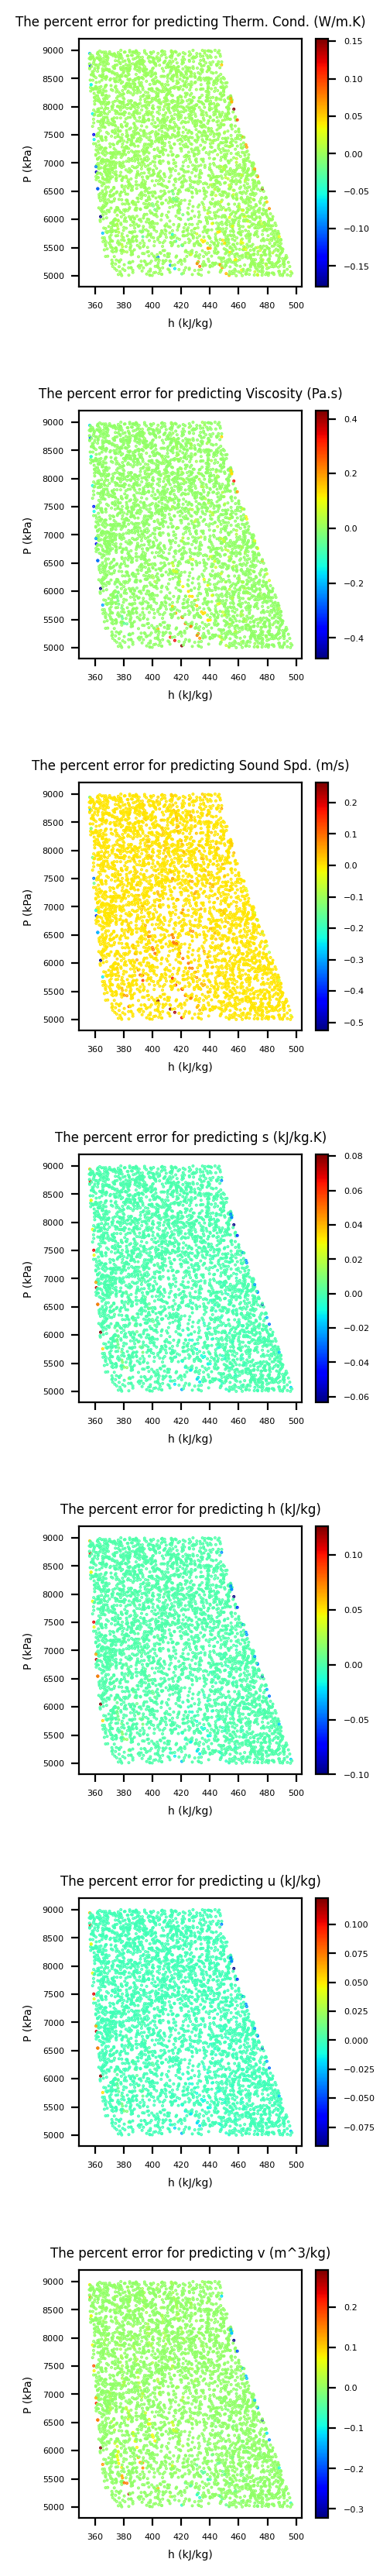

In [28]:
fig=plt.figure(dpi=200);


for i,col in enumerate(supercritical_error_df.columns):

  plt.rc('xtick', labelsize=4);
  plt.rc('ytick', labelsize=4);
  ax=fig.add_axes([0,(i*.6),.3,.4]);
  x=ax.scatter(supercritical_valid_y['h (kJ/kg)'], supercritical_valid_X['P (kPa)'], c=supercritical_error_df[col],cmap="jet", s=.2);
  ax.set_ylabel('P (kPa)',fontsize=5)
  plt.colorbar(x);
  plt.title('The percent error for predicting {}'.format(col),fontsize=6);
  ax.set_xlabel('h (kJ/kg)',fontsize=5);


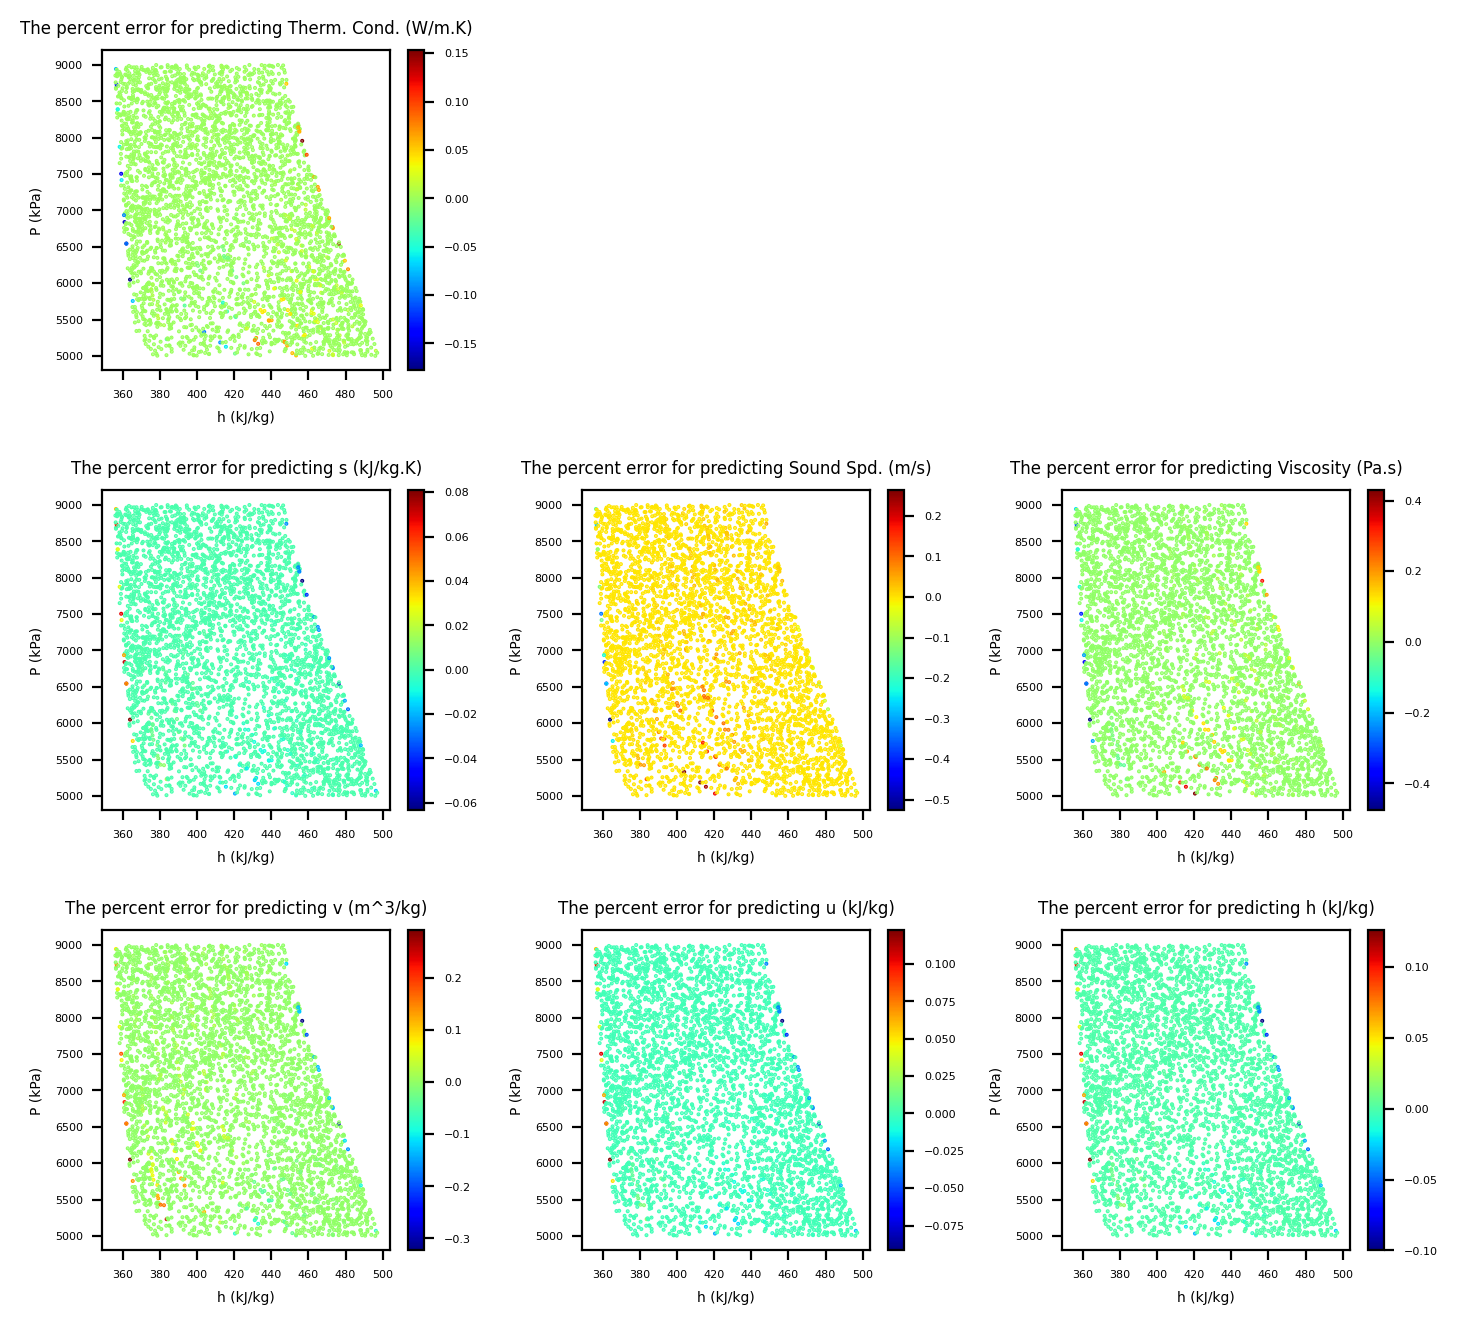

In [33]:
fig=plt.figure(dpi=200);


for i in range(0,4):
  for k in range(0,3):
    if ((k+(i*3))>(len(supercritical_error_df.columns)-1)):break
    col=supercritical_error_df.columns[(k+(i*3))]
    plt.rc('xtick', labelsize=4);
    plt.rc('ytick', labelsize=4);
    ax=fig.add_axes([(k*.4),(i*.55),.3,.4]);
    x=ax.scatter(supercritical_valid_y['h (kJ/kg)'], supercritical_valid_X['P (kPa)'], c=supercritical_error_df[col],cmap="jet", s=.2);
    ax.set_ylabel('P (kPa)',fontsize=5)
    plt.colorbar(x);
    plt.title('The percent error for predicting {}'.format(col),fontsize=6);
    ax.set_xlabel('h (kJ/kg)',fontsize=5);
  if ((i+k+1)>len(supercritical_error_df.columns)):break

In [34]:
for i,col in enumerate(supercritical_valid_y.columns):
  mse(supercritical_model.predict(supercritical_valid_X)[:,i],supercritical_valid_y[col])
  print('The MSE for the columns {} is {}'.format(col,mse(supercritical_model.predict(supercritical_valid_X)[:,i],supercritical_valid_y[col])))

The MSE for the columns v (m^3/kg) is 1.3029614115841977e-13
The MSE for the columns u (kJ/kg) is 0.0005270262709782051
The MSE for the columns h (kJ/kg) is 0.0006270100637334798
The MSE for the columns s (kJ/kg.K) is 3.972097113108978e-09
The MSE for the columns Sound Spd. (m/s) is 0.0018316843294354256
The MSE for the columns Viscosity (Pa.s) is 2.0091251588021776e-16
The MSE for the columns Therm. Cond. (W/m.K) is 2.2397120034202093e-11
